# Election Data Analysis

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1. Who was being polled and what was their party affiliation?
2. Did the poll results favor Romney or Obama?
3. How do undecided voters effect the poll?
4. Can we account for the undecided voters?
5. How did voter sentiment change over time?
6. Can we see an effect in the polls from the debates?



In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

import requests # API
from io import StringIO

- The data for the polls will be obtained from HuffPost Pollster. You can check their website http://elections.huffingtonpost.com/pollster.

In [3]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

data = requests.get(url).text

poll_data = StringIO(data)

In [4]:
poll_df = pd.read_csv(poll_data)
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [5]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [6]:
poll_df.describe()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,564.000000,586.000000,586.000000,423.000000,202.000000,0.0,586.0
mean,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0
std,1621.268369,2.422058,2.906180,3.701754,2.692726,NaN,0.0
min,328.000000,37.000000,32.000000,1.000000,0.000000,NaN,1.0
25%,855.000000,45.000000,43.000000,4.000000,2.000000,NaN,1.0
50%,1000.000000,47.000000,45.000000,6.000000,3.000000,NaN,1.0
75%,1500.000000,48.000000,46.750000,8.000000,4.000000,NaN,1.0
max,36472.000000,54.000000,53.000000,28.000000,19.000000,NaN,1.0


In [7]:
poll_df.columns

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Obama', 'Romney',
       'Undecided', 'Other', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation', 'Question Text', 'Question Iteration'],
      dtype='object')

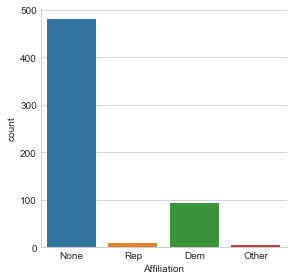

In [8]:
# Checking the affiliation and parisian
sns.factorplot('Affiliation', data=poll_df, kind="count")
plt.show()

- Keep in mind that there are more Dem affiliation than Rep

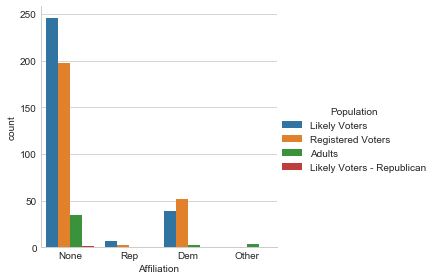

In [9]:
sns.factorplot('Affiliation', data=poll_df, kind='count', hue='Population')
plt.show()

In [10]:
# Averages
avg = pd.DataFrame(poll_df.mean())

avg.drop(['Number of Observations', 'Question Text', 'Question Iteration'], axis=0, inplace=True)
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [11]:
# Standard Devation
std = pd.DataFrame(poll_df.std())

std.drop(['Number of Observations', 'Question Text', 'Question Iteration'], axis=0, inplace=True)
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


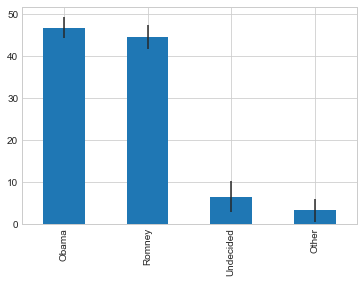

In [12]:
avg.plot(yerr=std, kind='bar', legend=False) # Y error means the black line on top of the bar graph


In [13]:
poll_std_avg = pd.concat([avg, std], axis=1)
poll_std_avg.columns = ['Average','Std. Deviation']
poll_std_avg

,Average,Std. Deviation
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


** Race is a pretty close between Obama and Romney. Other and Undecided should be looked at more closely.**

In [14]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [15]:
######

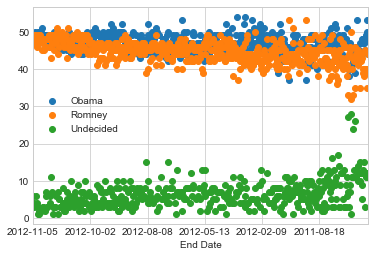

In [16]:
# A quick time-series about how people did vote for both of these candidates
# Noticed that the earlier dates are towards the left

poll_df.plot(x="End Date", y=['Obama','Romney','Undecided'], marker='o', linestyle='')
plt.show()

In [17]:
# MAKE THE ABOVE CHART MORE VISIBLE
#
#

In [19]:
# For timestamps
from datetime import datetime

In [20]:
# Difference btw. both candidates
# Positive value: Obama leads
# Negative value: Romney leads

poll_df['Difference'] = (poll_df.Obama-poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [21]:
# Organize the data through start_date
# Looking at the mean

poll_start_df = poll_df.groupby(['Start Date'], as_index=False).mean()
poll_start_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


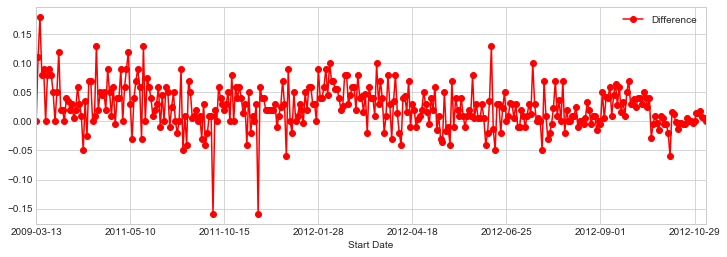

In [22]:
# Anything positive means that Obama had a huge lead
# There are a couple of negative spikes indicating the Romney got a huge turnout in those dates

poll_start_df.plot(x='Start Date',y='Difference',figsize=(12,4), marker='o',linestyle='-', color='red')
plt.show()

In [23]:
# Finding those big negtative spike
poll_start_df.nsmallest(10,'Difference')

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
94,2011-10-05,602.0,37.0,53.0,10.0,NaN,NaN,1,-0.16
118,2011-11-20,602.0,37.0,53.0,10.0,NaN,NaN,1,-0.16
133,2011-12-27,1500.0,39.0,45.0,6.0,19.0,NaN,1,-0.06
337,2012-10-15,2700.0,45.0,51.0,NaN,NaN,NaN,1,-0.06
25,2010-10-27,921.0,45.0,50.0,1.0,3.0,NaN,1,-0.05
78,2011-08-25,2335.0,40.0,45.0,3.0,11.0,NaN,1,-0.05
244,2012-06-19,1500.0,43.0,48.0,NaN,NaN,NaN,1,-0.05
269,2012-07-24,1500.0,44.0,49.0,NaN,NaN,NaN,1,-0.05
80,2011-08-29,NaN,45.0,49.0,4.0,2.0,NaN,1,-0.04
90,2011-09-27,2118.0,42.0,46.0,9.0,3.0,NaN,1,-0.04


In [24]:
# Finding those big negtative spike
romney_dates = poll_start_df.nsmallest(5,'Difference')['Start Date']
romney_dates = list(romney_dates)

** Debates were Oct 3rd, Oct 11, and Oct 22nd**

** Let look at the dates of the debate to see if they can provide any additional information**

In [26]:
# Narrow down the dates on October of 2012
row = 0
xindex = []

for date in poll_start_df['Start Date']:
    date = datetime.strptime(date, "%Y-%m-%d")
    if ((date.year == 2012) and (date.month == 10)):
        xindex.append(row)
        row += 1
    else:
        row += 1
        
min(xindex), max(xindex) # Checking the range of the index that I will be using
  

(325, 352)

In [27]:
poll_start_df.loc[327:343]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
327,2012-10-04,1061.500000,45.833333,48.666667,6.000000,NaN,NaN,1,-0.028333
328,2012-10-05,1000.000000,46.000000,46.500000,7.000000,1.000000,NaN,1,-0.005000
329,2012-10-06,895.000000,46.500000,45.500000,4.500000,3.000000,NaN,1,0.010000
330,2012-10-07,1197.333333,47.000000,47.333333,4.666667,1.500000,NaN,1,-0.003333
331,2012-10-08,2030.000000,46.500000,48.000000,5.000000,2.000000,NaN,1,-0.015000
332,2012-10-10,1118.000000,48.000000,47.000000,3.500000,2.000000,NaN,1,0.010000
333,2012-10-11,1335.250000,47.000000,46.500000,5.666667,1.666667,NaN,1,0.005000
334,2012-10-12,1231.500000,46.500000,47.000000,6.500000,NaN,NaN,1,-0.005000
335,2012-10-13,1163.000000,47.000000,47.500000,3.000000,NaN,NaN,1,-0.005000
336,2012-10-14,1000.000000,47.000000,49.000000,4.000000,NaN,NaN,1,-0.020000


In [28]:
# Oct 3rd, Oct 11, and Oct 22nd
# No Oct 3rd, will use Oct 4th
# Dates of the debates, getting the index

oct_4th = poll_start_df[poll_start_df['Start Date'] == "2012-10-04"].index.values
oct_11th = poll_start_df[poll_start_df['Start Date'] == "2012-10-11"].index.values
oct_22nd = poll_start_df[poll_start_df['Start Date'] == "2012-10-22"].index.values

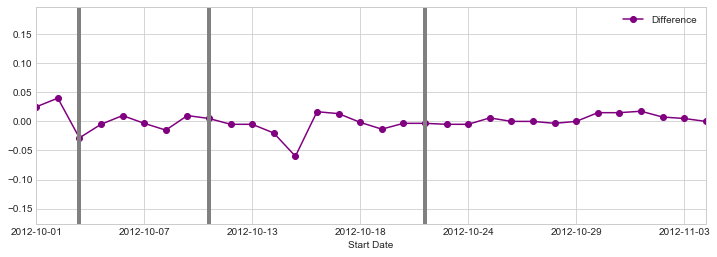

In [29]:
# Start with original figure
fig = poll_start_df.plot('Start Date','Difference',figsize=(12,4),
                         marker='o',linestyle='-',color='purple',xlim=(325,356))


# Now add the debate markers
plt.axvline(x=oct_4th, linewidth=4, color='grey')
plt.axvline(x=oct_11th, linewidth=4, color='grey')
plt.axvline(x=oct_22nd, linewidth=4, color='grey')

- After the first debate, Obama did better.
- After the second debate, Romney did better
- After the last debate, they did about the same

In [30]:
all_debate_nights = []

for date in romney_dates:
    all_debate_nights.append(datetime.strptime(date, "%Y-%m-%d"))


In [31]:
all_debate_nights

[datetime.datetime(2011, 10, 5, 0, 0),
 datetime.datetime(2011, 11, 20, 0, 0),
 datetime.datetime(2011, 12, 27, 0, 0),
 datetime.datetime(2012, 10, 15, 0, 0),
 datetime.datetime(2010, 10, 27, 0, 0)]

In [33]:
for i, date in enumerate(all_debate_nights):
    all_debate_nights[i] = [date.month, date.day, date.year]

In [34]:
all_debate_nights

[[10, 5, 2011], [11, 20, 2011], [12, 27, 2011], [10, 15, 2012], [10, 27, 2010]]

---

## Using the New York Times API
- I created a script that takes the date and topic and output all the articles on the date


In [200]:
from nytimes import NYTimes

In [203]:
data = NYTimes(10,6,2012,"Politics")

These are the relevant topics: 
Headline: Oct. 6: Romney Maintains Poll Momentum  
 Website can be found: https://fivethirtyeight.blogs.nytimes.com/2012/10/06/oct-6-romney-maintains-poll-momentum/ 

Headline: Wyoming, Energy and Libertarianism  
 Website can be found: https://fivethirtyeight.blogs.nytimes.com/2012/10/06/wyoming-energy-and-libertarianism/ 

Headline: Obama and Democrats Raise $181 Million in Septembe  
 Website can be found: https://thecaucus.blogs.nytimes.com/2012/10/06/obama-and-democrats-raise-181-million-in-september/ 

Headline: The Weekend Word: On the Job  
 Website can be found: https://thecaucus.blogs.nytimes.com/2012/10/06/the-weekend-word-numbers-game/ 

Headline: Florida: Registration Complaints Against Democrats  
 Website can be found: https://www.nytimes.com/2012/10/06/us/politics/florida-registration-complaints-against-democrats.html 

Headline: Leading Maryland and Virginia, With Stars on the R  
 Website can be found: https://www.nytimes.com/2012/10/06

---

# Donor Data Set

The questions we will be trying to answer while looking at this Data Set is:

1. How much was donated and what was the average donation?
2. How did the donations differ between candidates?
3. How did the donations differ between Democrats and Republicans?
4. What were the demographics of the donors?
5. Is there a pattern to donation amounts?

In [36]:
# Set the DataFrame as the csv file
donor_df = pd.read_csv('Election_Donor_Data.csv', low_memory=False)

In [37]:
donor_df.shape

(1001731, 16)

In [38]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [39]:
donor_df.describe()

,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


In [40]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [41]:
# amount that was donated
# Lots of diff. values (8079)
donor_df['contb_receipt_amt'].value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [42]:
don_rec_avg = donor_df['contb_receipt_amt'].mean()
don_rec_std = donor_df['contb_receipt_amt'].std()

print("The average is {0:.2f} and the standard deviation is {1:.2f}".format(don_rec_avg, don_rec_std))

The average is 298.24 and the standard deviation is 3749.67


- Notice how the standard deviation is VERY large compared to the mean

In [43]:
top_donor_df = donor_df['contb_receipt_amt'].copy()
top_donor_df.sort_values().head(10)

114604   -30800.00
226986   -25800.00
101356    -7500.00
398429    -5500.00
250737    -5455.00
33821     -5414.31
908565    -5115.00
456649    -5000.00
574657    -5000.00
30513     -5000.00
Name: contb_receipt_amt, dtype: float64

In [44]:
# NOTICE: There are huge negative values bc these are refunds
# We do not need this information
# this is why we have large stanard deviation

In [45]:
top_donor_df = top_donor_df[top_donor_df > 0] # only for positive values
top_donor_df.sort_values().head()

335573    0.01
335407    0.01
335352    0.01
324596    0.01
329896    0.01
Name: contb_receipt_amt, dtype: float64

In [46]:
# The top donation amount
top_donor_df.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

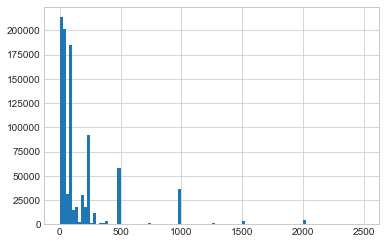

In [47]:
common_don = top_donor_df[top_donor_df < 2500] # within the largest donation, 2500 was the largest

common_don.hist(bins=100) # There are peaks that our shown with value_counts() as well

In [48]:
# Candidates of the election
candidate = donor_df['cand_nm'].unique()
candidate

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [49]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)


In [50]:
# Redo the procedure but updated with the party affiliation
donor_df = donor_df[donor_df.contb_receipt_amt > 0]


In [51]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [52]:
# Represents how many people dondated for them

donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [53]:
# Represents total amount of donation

total_cand_sum = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

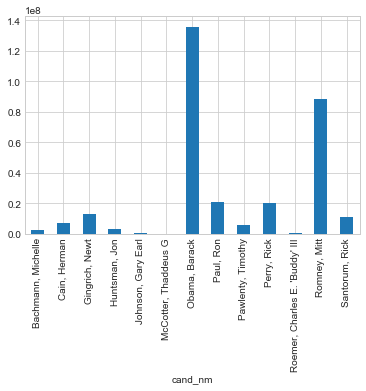

In [54]:
total_cand_sum.plot(kind='bar')

# Obama got the most donation because he is the only in the democrats pary

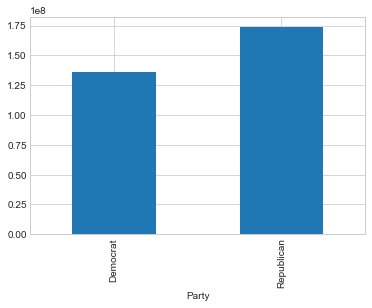

In [55]:
# donation of democrats vs republicans
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')


In [56]:
occupations_df = donor_df.pivot_table('contb_receipt_amt', 
                                     index='contbr_occupation',
                                     columns='Party',
                                     aggfunc='sum')
occupations_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [57]:
occupations_df.shape

# LARGE DF because there are a lot of diff. contribution

(45067, 2)

In [58]:
# The 1 represents bc we are adding the column
# and checking if the total sum of that occupation is greater than 1000000
# And only working with those occupation
occupations_df = occupations_df[occupations_df.sum(1) > 1000000]

In [59]:
occupations_df.shape

(31, 2)

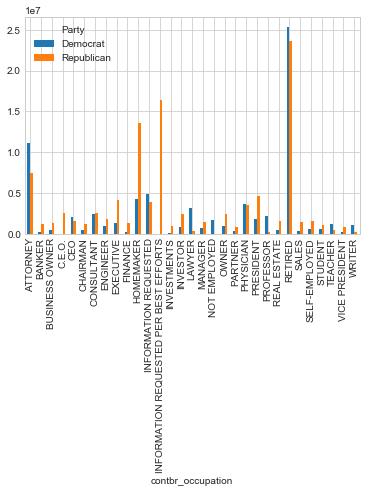

In [60]:
occupations_df.plot(kind='bar')

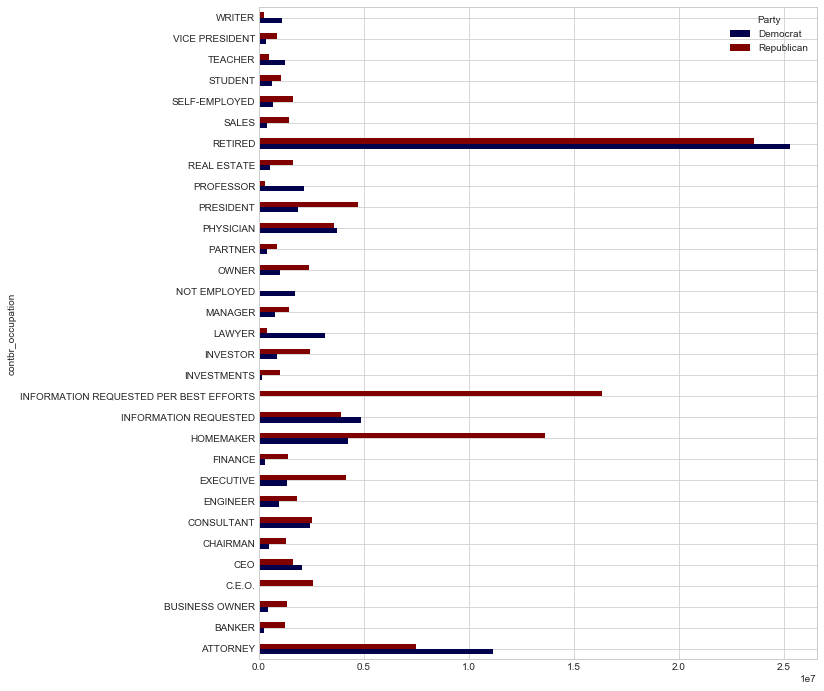

In [61]:
# horizontal graph
# seismic plots the blue and red
occupations_df.plot(kind='barh',figsize=(10,12), cmap='seismic')

# FIX the Information columns as they are like an NA
# FIX the two CEO columns

In [62]:
# removing the info. columns
occupations_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace=True) # columns

In [63]:
# putting the ceo columns together
occupations_df.loc['CEO'] = occupations_df.loc['CEO'] + occupations_df.loc['C.E.O.']

In [64]:
# Deleting the extra CEO row
occupations_df.drop('C.E.O.', inplace=True)

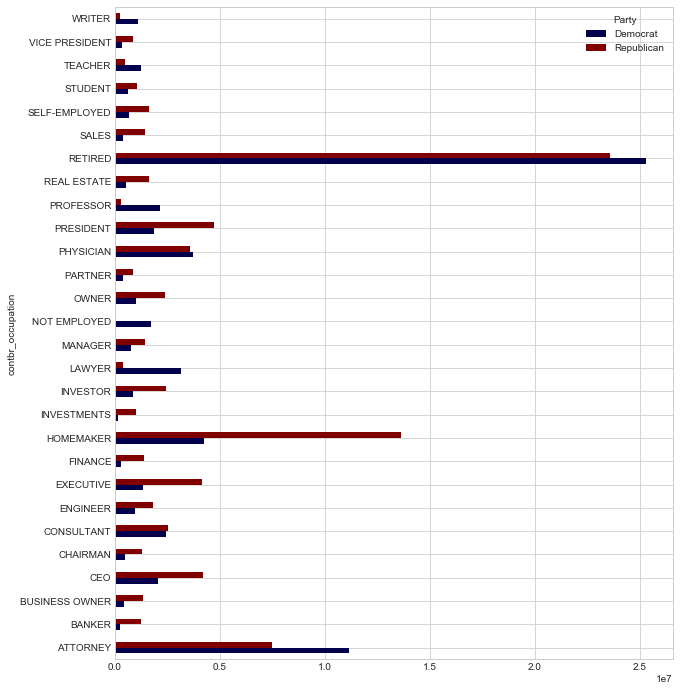

In [65]:
# horizontal graph
occupations_df.plot(kind='barh',figsize=(10,12), cmap='seismic')


For more on general data analysis of politics, I highly suggest the https://fivethirtyeight.com/politics/ website!

